# NEW-YORK CAB FARE PREDICTION


## IMPORTING LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATASET

In [3]:
file = '/kaggle/input/new-york-city-taxi-fare-prediction/train.csv'

In [4]:
fare=pd.read_csv(file, dtype={'fare_amount':np.float64}, na_values={'fare_amount':'430-'}, nrows = 7000000)
fare.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,7.000000e+06,7.000000e+06,7.000000e+06,6.999953e+06,6.999953e+06,7.000000e+06
mean,1.133867e+01,-7.251402e+01,3.992355e+01,-7.251180e+01,3.992142e+01,1.684787e+00
std,9.805315e+00,1.296179e+01,9.050569e+00,1.281304e+01,9.472701e+00,1.325102e+00
min,-1.077500e+02,-3.439245e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396368e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [6]:
fare.shape

(7000000, 8)

Here we can see that the dataset is having 7000000 rows and 8 columns.

In [7]:
fare.isnull().sum() # to check if any rows are having null values

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    47
dropoff_latitude     47
passenger_count       0
dtype: int64

In [8]:
#to drop all the rows having null values
fare = fare.dropna(how='any' ,axis =0)

In [9]:
# to check if any duplicates are present
fare.duplicated().sum()

0

In [10]:
fare.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:

def get_cleaned(df):
    return df[(df.fare_amount > 0) &
              (df.passenger_count > 0) & (df.passenger_count < 8)]

fare = get_cleaned(fare)
print(len(fare))
print("Data lost after the cleaning process: ", 7000000 - len(fare))

6974732
Data lost after the cleaning process:  25268


In many columns passenger_count is greater than 7 . But a car can be maximum 7 seater . 
Also, fare amount cannot be negative.
Thus to remove this we applied the above function and lost 25268 rows which is 0.3% of the total data . Hence, we can easily remove the above rows. 

In [12]:
# function to take time from pickup_datetime and converting it into secs
def func(x):
    x = x.split()
    if len(x) == 3:
        time = x[1]
        time = time.split(":")
        sec = int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])
        return sec
    else:
        return "Error_values"

In [13]:
func('2009-06-15 17:26:21 UTC') # example showing a value 

62781

In [14]:
# add the values in a seperate column pickup_time_seconds
fare['pickup_time_seconds'] = fare['pickup_datetime'].apply(func)

In [15]:
fare = fare[fare.pickup_time_seconds != "Error_values"]
# to remove al the values not having proper pickup time values 

In [16]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6974732 entries, 0 to 6999999
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   key                  object 
 1   fare_amount          float64
 2   pickup_datetime      object 
 3   pickup_longitude     float64
 4   pickup_latitude      float64
 5   dropoff_longitude    float64
 6   dropoff_latitude     float64
 7   passenger_count      int64  
 8   pickup_time_seconds  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 532.1+ MB


In [17]:
fare.corr()['fare_amount']

fare_amount            1.000000
pickup_longitude       0.008681
pickup_latitude       -0.006770
dropoff_longitude      0.009424
dropoff_latitude      -0.006777
passenger_count        0.012509
pickup_time_seconds   -0.017755
Name: fare_amount, dtype: float64

## HEATMAP SHOWING CORRELATION BETWEEN COLUMNS

<AxesSubplot:>

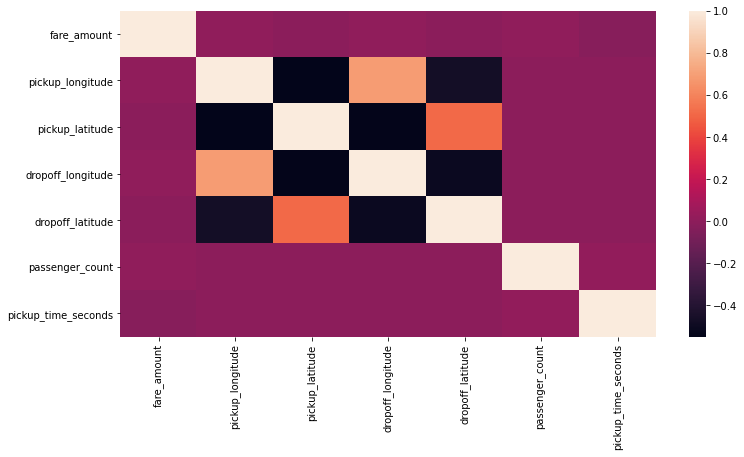

In [18]:
plt.figure(figsize = (12, 6))
sns.heatmap(fare.corr())

In [19]:
t = '00:22:10'
#dt.datetime(t)

In [20]:
x = ["fare_amount"]
y = ["passenger_count","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

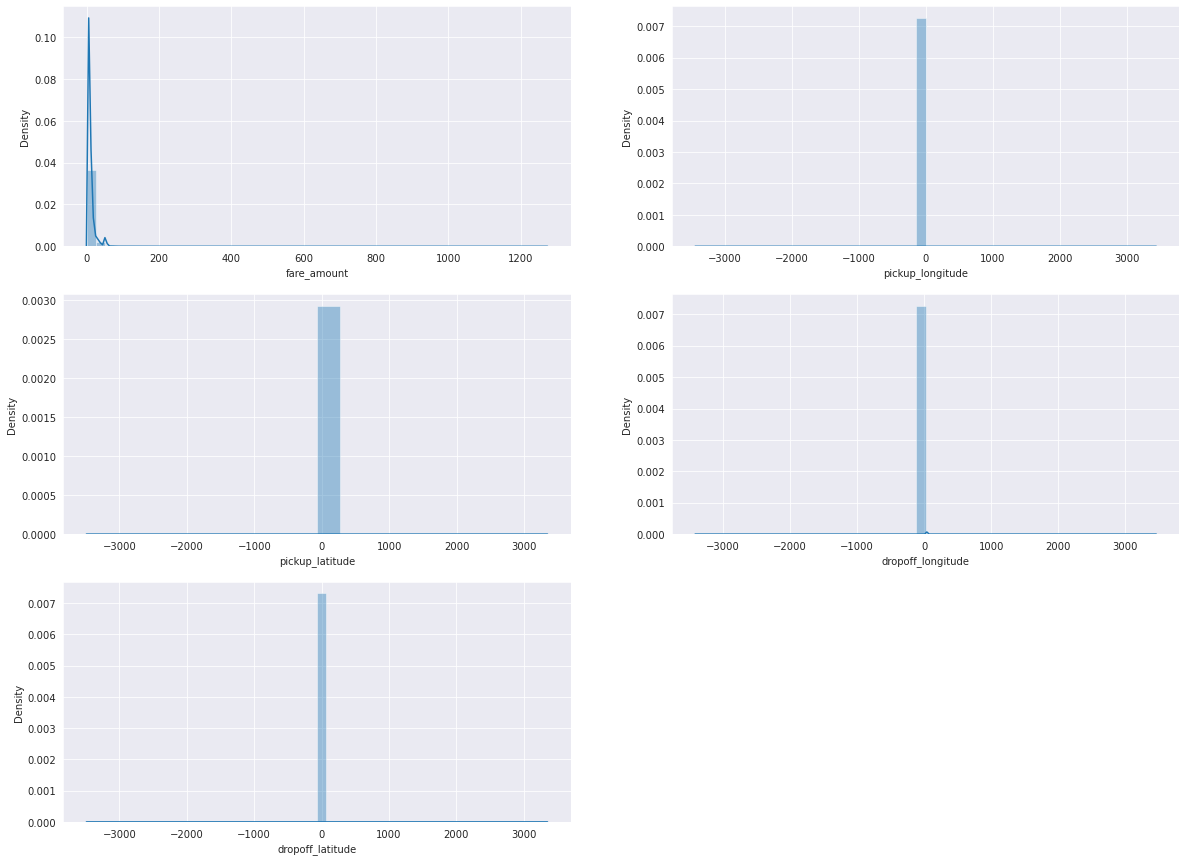

In [21]:
plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')
plt.subplot(321)
sns.distplot(fare["fare_amount"])
plt.subplot(322)
sns.distplot(fare["pickup_longitude"])
plt.subplot(323)
sns.distplot(fare["pickup_latitude"],bins=20)
plt.subplot(324)
sns.distplot(fare["dropoff_longitude"],bins=50)
plt.subplot(325)
sns.distplot(fare["dropoff_latitude"],bins=50)


In [22]:
X = fare.iloc[:,3:]
Y = fare.iloc[:,1]

In [23]:
Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [24]:
#importing train-test split form sklearn module to split the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579785 entries, 5538687 to 6436675
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   pickup_longitude     float64
 1   pickup_latitude      float64
 2   dropoff_longitude    float64
 3   dropoff_latitude     float64
 4   passenger_count      int64  
 5   pickup_time_seconds  int64  
dtypes: float64(4), int64(2)
memory usage: 298.0 MB


## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(x_test)
y_pred

array([11.42388033, 11.30088929, 11.09617908, ..., 11.59935464,
       11.40531036, 11.03821712])

In [28]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

9.84686221404023


## Random Forest Regression

In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor
rmf=RandomForestRegressor(n_estimators=20,random_state=10, n_jobs=-1)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf    

CPU times: user 39min 29s, sys: 11.7 s, total: 39min 41s
Wall time: 10min 8s


RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=10)

In [30]:
y_pred2 = rmf.predict(x_test)
y_pred2

array([55.279,  9.015, 10.26 , ..., 16.43 , 28.367, 11.925])

In [31]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

4.643090167823948


In [32]:
x_test['Prediction_random'] = y_pred2
x_test["Fare"] = y_test
x_test["Prediction_linear"] = y_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_seconds,Prediction_random,Fare,Prediction_linear
2272931,-73.961687,40.796056,-73.783136,40.648975,1,29221,55.279,57.33,11.423880
1450878,-73.943090,40.747288,-73.948583,40.763427,1,45780,9.015,8.00,11.300889
1066698,-73.973867,40.760506,-73.967344,40.792880,1,73502,10.260,9.30,11.096179
5302331,-73.978136,40.786658,-73.983303,40.771480,1,34650,6.255,6.50,11.382696
2381526,-73.976319,40.744180,-73.973144,40.746149,1,49617,4.970,6.00,11.272459
...,...,...,...,...,...,...,...,...,...
1715515,-74.005401,40.740026,-73.999001,40.734268,3,10269,4.905,7.00,11.751220
560979,-74.002805,40.728664,-73.964639,40.772970,1,36172,16.500,17.50,11.371549
2685473,-73.992182,40.725025,-73.945675,40.792948,2,18084,16.430,13.30,11.599355
1072162,-73.871185,40.773754,-73.986122,40.728745,5,82793,28.367,29.00,11.405310


In [34]:
!pip install jovian --quiet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [35]:
import jovian

<IPython.core.display.Javascript object>

In [36]:
jovian.log()

AttributeError: module 'jovian' has no attribute 'log'

In [ ]:
jovian.commit(project = "demo")